In [1]:
import os
from glob import glob
from subprocess import run

def encode_IRM(in_dir,modality_names,encode):
    
    for modality_name in modality_names:
        imgs = os.path.join(in_dir, f'*{modality_name.upper()}*.nii.gz')
        imgs = sorted(glob(imgs))
        num_imgs = len(imgs)
        for img_id, img in enumerate(imgs):
            prefix = os.path.basename(img)
            prefix = prefix.replace('.nii.gz', '')
            print(f'{str(img_id+1)}/{str(num_imgs)} Processing: {prefix}')
            cmd = 'python ../encode_2d.py ' + \
                    f'--in-img {img} ' + \
                    f'--out-dir {encode} ' + \
                    f'--pretrained-model ../models/epoch005_batch0000.pt' + \
                    f'--prefix {prefix} ' + \
                    f'--avg-theta ' + \
                    f'--norm 1000 ' + \
                    f'--gpu 0 ' + \
                    f'--beta-dim 4 ' + \
                    f'--theta-dim 2'
            #os.system(cmd)
            run(cmd.split(" "))

In [2]:
in_dir= 'irm'
modality_names = ['T1', 'T2']
encode_sit_A='./test_decode/encode'

#in_dir_site_B = '../IRM/Site_B'
#modality_names = ['T1', 'T2']
#encode_sit_B='../IRM/Site_B/encode'

In [3]:
encode_IRM(in_dir,modality_names,encode_sit_A)

1/2 Processing: 19_T1_AXIAL_SLICE110
2/2 Processing: SAMPLE_T1w_SUB001_AXIAL_SLICE120
1/1 Processing: 19_T2_AXIAL_SLICE110


In [4]:
!python ../encode_2d.py \
    --in-dir ./irm \
    --data-name T1 \
    --orientation AXIAL \
    --out-dir ./test_decode/encode \
    --pretrained-model ../models/epoch004_batch0000.pt \
    --gpu 0

Processing: 0/2
Processing: 1/2


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
import nibabel as nib

# Load the image data
img = nib.load('irm/19_T1_AXIAL_SLICE110.nii.gz')

# Get the image data as a 2D numpy array
data = img.get_fdata()

# Print some information about the image
print(f"Image shape: {data.shape}")
print(f"Voxel size: {img.header['pixdim'][1:4]}")


Image shape: (197, 233)
Voxel size: [1. 1. 1.]


In [6]:
data

array([[-108.15672302, -108.15672302, -108.15672302, ..., -108.15672302,
        -108.15672302, -108.15672302],
       [-108.15672302, -108.15672302, -108.15672302, ..., -108.15672302,
        -108.15672302, -108.15672302],
       [-108.15672302, -108.15672302, -108.15672302, ..., -108.15672302,
        -108.15672302, -108.15672302],
       ...,
       [-108.15672302, -108.15672302, -108.15672302, ..., -108.15672302,
        -108.15672302, -108.15672302],
       [-108.15672302, -108.15672302, -108.15672302, ..., -108.15672302,
        -108.15672302, -108.15672302],
       [-108.15672302, -108.15672302, -108.15672302, ..., -108.15672302,
        -108.15672302, -108.15672302]])

In [7]:
img.header

In [8]:
print(nib.load("irm/19_T1_AXIAL_SLICE110.nii.gz"))

<class 'nibabel.nifti1.Nifti1Image'>
data shape (197, 233)
affine: 
[[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  2 197 233   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned


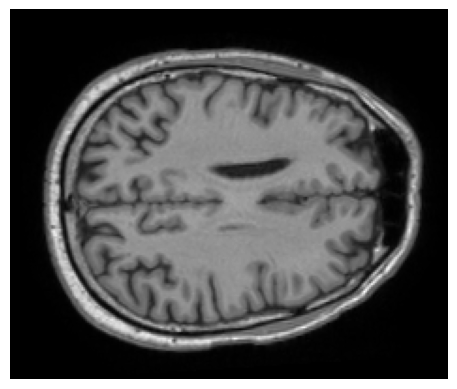

In [9]:
import nibabel as nib
import matplotlib.pyplot as plt


# Display the image using imshow()
plt.imshow(data[:, :], cmap='gray')
plt.axis('off') # turn off axis ticks and labels
plt.show()


In [10]:
print(nib.load("irm/SAMPLE_T1w_SUB001_AXIAL_SLICE120.nii.gz"))

<class 'nibabel.nifti1.Nifti1Image'>
data shape (241, 286)
affine: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  2 241 286   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quat

In [11]:
from modules.model import *

In [12]:
from encode_2d import *